In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# correlation_data csv를 불러옴
correlation_data = pd.read_csv('C:\\Users\\USER\\workspace\\TSB\\Model\\correlation_data_all.csv')

# File_name값에 'prev'가 포함되면 Timeline값을 'prev'로 변경
correlation_data.loc[correlation_data['File_name'].str.contains('prev'), 'Timeline'] = 'prev'

# File_name값에 'post'가 포함되면 Timeline값을 'post'로 변경
correlation_data.loc[correlation_data['File_name'].str.contains('now'), 'Timeline'] = 'now'

correlation_data

,File_name,Type,Objective_value,C_max,C_avg,Timeline
0,prev_Truck_20_LP_0_0_100_1rep.csv,Min,63800,427.120,384.7000,prev
1,now_Truck_20_LP_0_0_100_1rep.csv,Min,68000,436.192,390.1900,now
2,prev_Truck_20_LP_40_50_10_1rep.csv,Min,34751,413.552,382.6468,prev
3,now_Truck_20_LP_40_50_10_1rep.csv,Min,34924,451.584,394.8568,now
4,prev_Truck_20_LP_0_0_100_1rep.csv,Middle,98400,466.880,428.1868,prev
...,...,...,...,...,...,...
235,now_Truck_20_LP_40_50_10_20rep.csv,Middle,48319,458.872,421.6148,now
236,prev_Truck_20_LP_0_0_100_20rep.csv,Max,112800,490.896,439.8356,prev
237,now_Truck_20_LP_0_0_100_20rep.csv,Max,115600,490.912,435.9680,now
238,prev_Truck_20_LP_40_50_10_20rep.csv,Max,59834,480.576,437.9800,prev


In [2]:
# 특정 폴더 경로 설정 (본인의 실제 경로로 수정해주세요)
root_folder = 'C:\\Users\\USER\\workspace\\TSB\\Simulation\\Assets\\Results\\Correlation_cost_completiontime'

# 결과를 저장할 리스트 초기화
result_data = []

# root_folder 안의 모든 서브폴더에 대해 순회
for folder_name in os.listdir(root_folder):
    folder_path = os.path.join(root_folder, folder_name)

    # 서브폴더인 경우에만 처리
    if os.path.isdir(folder_path):
        print(f"Processing folder: {folder_path}")

        # 서브폴더 안의 모든 CSV 파일에 대해 순회
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.csv'):
                file_path = os.path.join(folder_path, file_name)

                # CSV 파일을 데이터프레임으로 읽어옴
                df = pd.read_csv(file_path)

                # 파일명과 'Congestion_ratio_AVG_prev', 'Congestion_ratio_AVG_now', 'Congestion_ratio_AVG' 행의 1번째 값을 변수로 저장
                file_name_variable = file_name
                avg_prev_variable = df.at[0, 'Congestion_ratio_AVG_prev']
                avg_now_variable = df.at[0, 'Congestion_ratio_AVG_now']
                avg_variable = df.at[0, 'Congestion_ratio_AVG']

                # 'min', 'middle', 'max' 중 어떤 것이 포함되어 있는지 확인하여 'Type' 열에 추가
                folder_type = None
                if 'min' in folder_name.lower():
                    folder_type = 'Min'
                elif 'middle' in folder_name.lower():
                    folder_type = 'Middle'
                elif 'max' in folder_name.lower():
                    folder_type = 'Max'

                # 결과를 리스트에 추가
                result_data.append({
                    'File_name': file_name_variable,
                    'Congestion_ratio_AVG_prev': avg_prev_variable,
                    'Congestion_ratio_AVG_now': avg_now_variable,
                    'Congestion_ratio_AVG': avg_variable,
                    'Type': folder_type
                })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(result_data)

# 결과 출력
result_df


Processing folder: C:\Users\USER\workspace\TSB\Simulation\Assets\Results\Correlation_cost_completiontime\prev_20_now_20_max
Processing folder: C:\Users\USER\workspace\TSB\Simulation\Assets\Results\Correlation_cost_completiontime\prev_20_now_20_middle
Processing folder: C:\Users\USER\workspace\TSB\Simulation\Assets\Results\Correlation_cost_completiontime\prev_20_now_20_min


,File_name,Congestion_ratio_AVG_prev,Congestion_ratio_AVG_now,Congestion_ratio_AVG,Type
0,result_prev_RoutePoints_20_LP_0_0_100_10rep.cs...,0.155864,0.183358,0.169611,Max
1,result_prev_RoutePoints_20_LP_0_0_100_11rep.cs...,0.143232,0.163911,0.153572,Max
2,result_prev_RoutePoints_20_LP_0_0_100_12rep.cs...,1.063896,0.449031,0.756463,Max
3,result_prev_RoutePoints_20_LP_0_0_100_13rep.cs...,0.229776,0.174711,0.202243,Max
4,result_prev_RoutePoints_20_LP_0_0_100_14rep.cs...,0.214199,0.174683,0.194441,Max
...,...,...,...,...,...
115,result_prev_RoutePoints_20_LP_40_50_10_5rep.cs...,0.112903,0.137246,0.125075,Min
116,result_prev_RoutePoints_20_LP_40_50_10_6rep.cs...,0.156535,0.080810,0.118673,Min
117,result_prev_RoutePoints_20_LP_40_50_10_7rep.cs...,0.171467,0.136599,0.154033,Min
118,result_prev_RoutePoints_20_LP_40_50_10_8rep.cs...,0.165916,0.160230,0.163073,Min


In [3]:
# 'File_name'의 앞 7글자를 제외한 값을 '_with_'를 기준으로 앞뒤로 분리하여 새로운 행을 만듦
result_df_split1 = result_df.copy()
result_df_split2 = result_df.copy()


result_df_split1['File_name'] = result_df['File_name'].str[7:]
result_df_split2['File_name'] = result_df['File_name'].str[7:]


# 'File_name'안의 모든 'RoutePoints'라는 글자는 'Truck'으로 변환
result_df_split1['File_name'] = result_df_split1['File_name'].str.replace('RoutePoints', 'Truck')
result_df_split2['File_name'] = result_df_split2['File_name'].str.replace('RoutePoints', 'Truck')

# 'File_name'열의 '_with_'까지의 값을 다 지우고 남은 값을 'File_name'열에 저장
result_df_split1['File_name'] = result_df_split1['File_name'].str.split('_with_').str[0]

# '_with_' 뒤부터 끝까지의 값을 'File_name'열에 저장
result_df_split2['File_name'] = result_df_split2['File_name'].str.split('_with_').str[1]

# 합치기
result_df_split = pd.concat([result_df_split1, result_df_split2])


df = result_df_split.copy()
prev_df = df[df['File_name'].str.startswith('prev')]
prev_df['Congestion_ratio_AVG'] = prev_df['Congestion_ratio_AVG_prev']

# File_name이 'now'로 시작하는 경우
now_df = df[df['File_name'].str.startswith('now')]
now_df['Congestion_ratio_AVG'] = now_df['Congestion_ratio_AVG_now']

# Concatenate 두 데이터프레임
result_df_split = pd.concat([prev_df, now_df], ignore_index=True)

# Congestion_ratio_AVG_prev	Congestion_ratio_AVG_now 열 삭제
result_df_split = result_df_split.drop(['Congestion_ratio_AVG_prev', 'Congestion_ratio_AVG_now'], axis=1)

result_df_split


c:\Users\USER\anaconda3\envs\hyeooi\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\USER\anaconda3\envs\hyeooi\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,File_name,Congestion_ratio_AVG,Type
0,prev_Truck_20_LP_0_0_100_10rep.csv,0.155864,Max
1,prev_Truck_20_LP_0_0_100_11rep.csv,0.143232,Max
2,prev_Truck_20_LP_0_0_100_12rep.csv,1.063896,Max
3,prev_Truck_20_LP_0_0_100_13rep.csv,0.229776,Max
4,prev_Truck_20_LP_0_0_100_14rep.csv,0.214199,Max
...,...,...,...
235,now_Truck_20_LP_40_50_10_5rep.csv,0.137246,Min
236,now_Truck_20_LP_40_50_10_6rep.csv,0.080810,Min
237,now_Truck_20_LP_40_50_10_7rep.csv,0.136599,Min
238,now_Truck_20_LP_40_50_10_8rep.csv,0.160230,Min


In [4]:
# correlation_data과 result_df_split을 File_name, Type을 기준으로 합침
correlation_data = pd.merge(correlation_data, result_df_split, on=['File_name', 'Type'])

correlation_data

,File_name,Type,Objective_value,C_max,C_avg,Timeline,Congestion_ratio_AVG
0,prev_Truck_20_LP_0_0_100_1rep.csv,Min,63800,427.120,384.7000,prev,0.220976
1,now_Truck_20_LP_0_0_100_1rep.csv,Min,68000,436.192,390.1900,now,0.207952
2,prev_Truck_20_LP_40_50_10_1rep.csv,Min,34751,413.552,382.6468,prev,0.170279
3,now_Truck_20_LP_40_50_10_1rep.csv,Min,34924,451.584,394.8568,now,0.251744
4,prev_Truck_20_LP_0_0_100_1rep.csv,Middle,98400,466.880,428.1868,prev,0.277137
...,...,...,...,...,...,...,...
235,now_Truck_20_LP_40_50_10_20rep.csv,Middle,48319,458.872,421.6148,now,0.147750
236,prev_Truck_20_LP_0_0_100_20rep.csv,Max,112800,490.896,439.8356,prev,0.224792
237,now_Truck_20_LP_0_0_100_20rep.csv,Max,115600,490.912,435.9680,now,0.158609
238,prev_Truck_20_LP_40_50_10_20rep.csv,Max,59834,480.576,437.9800,prev,0.190731


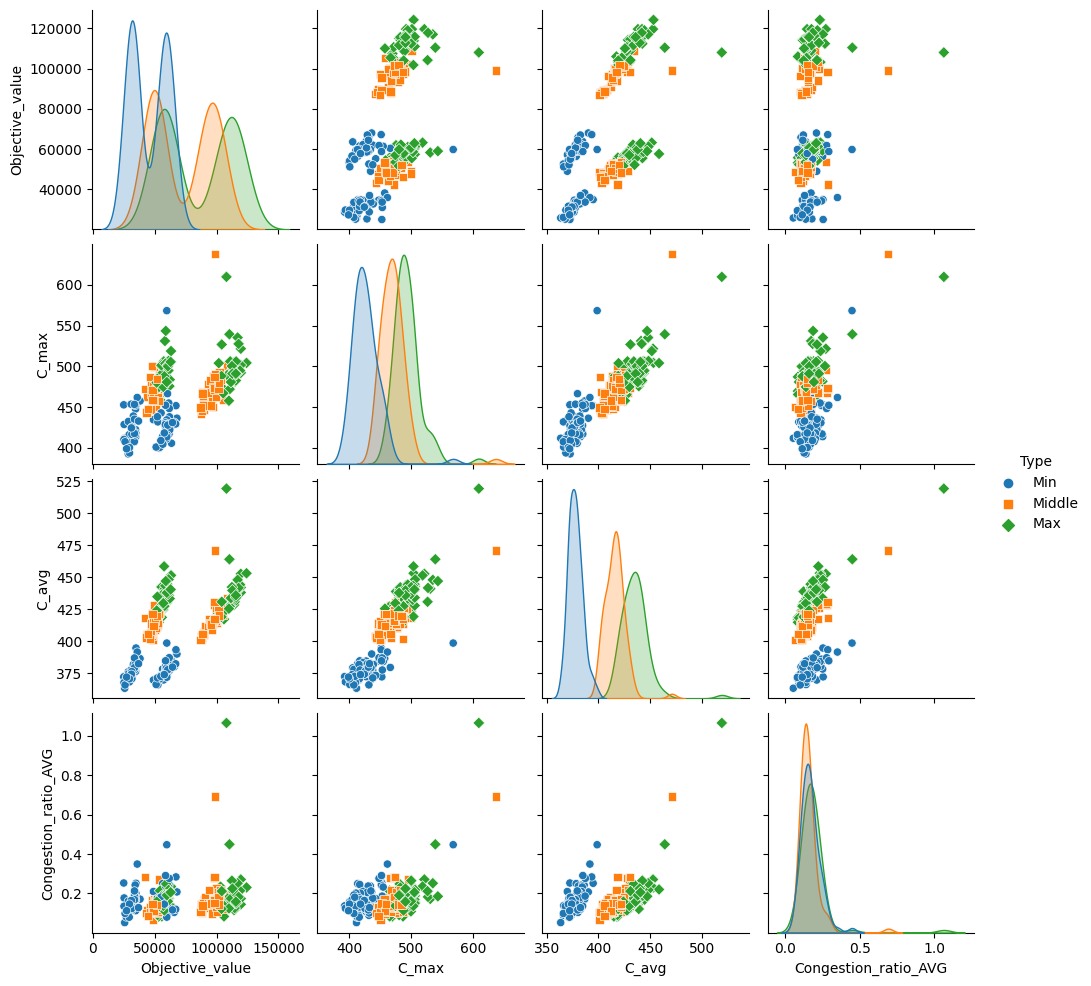

In [5]:
df = correlation_data.copy()

sns.pairplot(df, hue="Type", markers=["o", "s", "D"])
plt.show()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

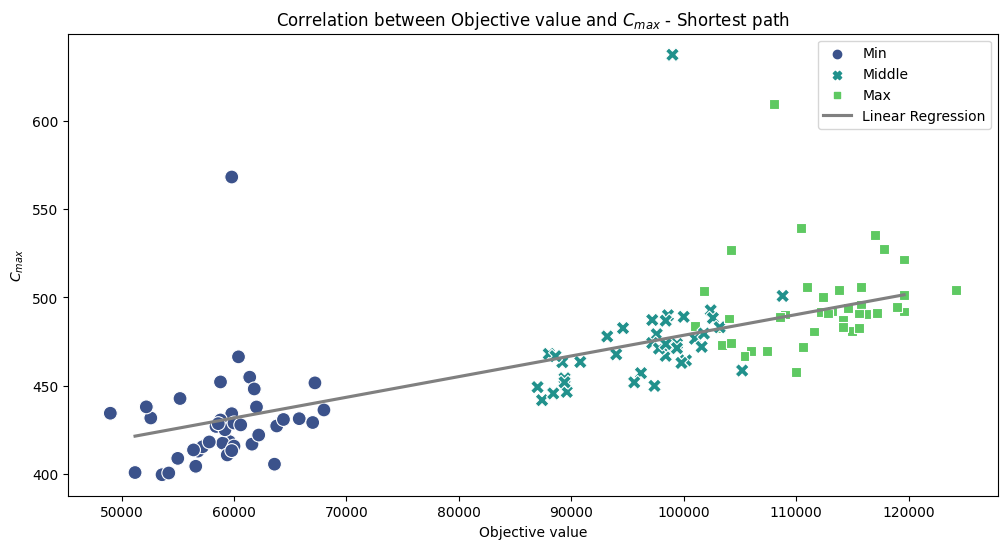

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


df = correlation_data.copy()

# Remove outliers for 'C_max'
filtered_data = df[df['File_name'].str.contains('_0_0_100')]

# Create a scatter plot with seaborn
plt.figure(figsize=(12, 6))

# Scatter plot
sns.scatterplot(data=filtered_data, x='Objective_value', y='C_max', hue='Type', style='Type', palette='viridis', s=100)

# Linear regression for the filtered dataset
X_filtered = filtered_data['Objective_value'].values.reshape(-1, 1)
y_filtered = filtered_data['C_max'].values.reshape(-1, 1)
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)
model_filtered = LinearRegression()
model_filtered.fit(X_train_filtered, y_train_filtered)

# Plotting the linear regression line for the filtered data
sns.regplot(x=X_test_filtered.flatten(), y=model_filtered.predict(X_test_filtered).flatten(), scatter=False, color='gray', label='Linear Regression')

plt.title('Correlation between Objective value and ${C_{max}}$ - Shortest path')
plt.xlabel('Objective value')
plt.ylabel('${C_{max}}$')
plt.legend()
plt.show()


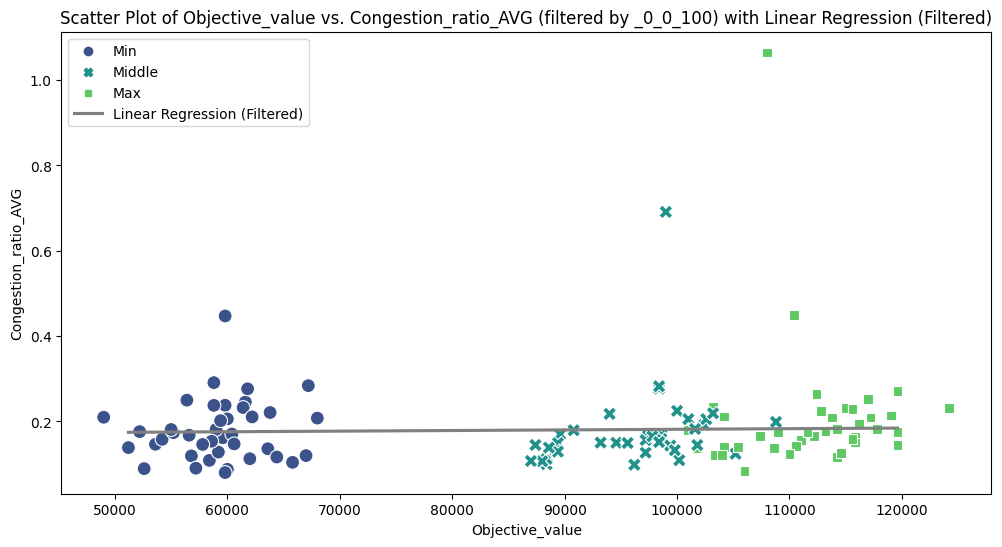

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = correlation_data.copy()

# Remove outliers for 'C_max'
filtered_data = df[df['File_name'].str.contains('_0_0_100')]

# Create a scatter plot with seaborn
plt.figure(figsize=(12, 6))

# Scatter plot
sns.scatterplot(data=filtered_data, x='Objective_value', y='Congestion_ratio_AVG', hue='Type', style='Type', palette='viridis', s=100)

# Linear regression for the filtered dataset
X_filtered = filtered_data['Objective_value'].values.reshape(-1, 1)
y_filtered = filtered_data['Congestion_ratio_AVG'].values.reshape(-1, 1)
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)
model_filtered = LinearRegression()
model_filtered.fit(X_train_filtered, y_train_filtered)

# Plotting the linear regression line for the filtered data
sns.regplot(x=X_test_filtered.flatten(), y=model_filtered.predict(X_test_filtered).flatten(), scatter=False, color='gray', label='Linear Regression (Filtered)')

plt.title('Scatter Plot of Objective_value vs. Congestion_ratio_AVG (filtered by _0_0_100) with Linear Regression (Filtered)')
plt.xlabel('Objective_value')
plt.ylabel('Congestion_ratio_AVG')
plt.legend()
plt.show()


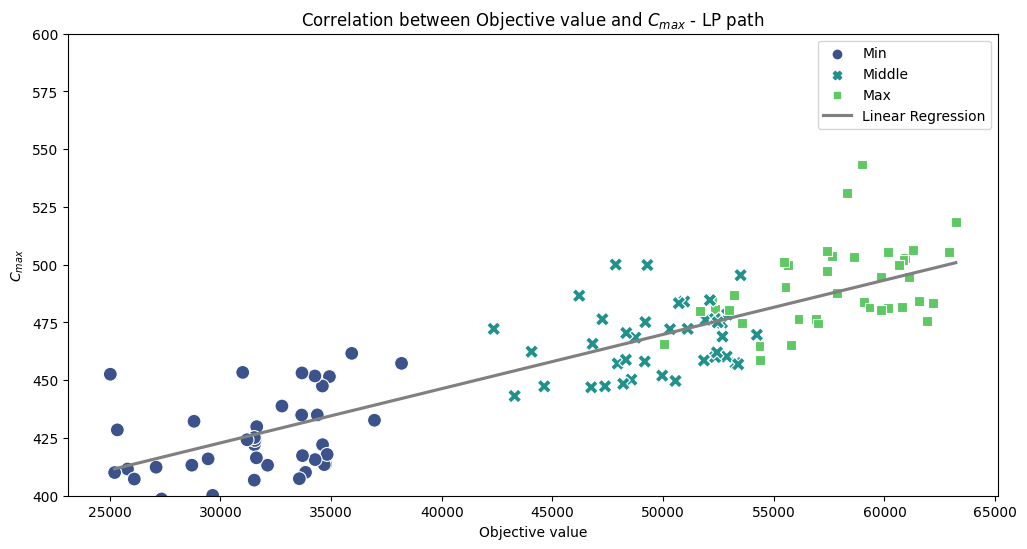

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = correlation_data.copy()

# Remove outliers for 'C_max'
filtered_data = df[df['File_name'].str.contains('_40_50_10')]

# Create a scatter plot with seaborn
plt.figure(figsize=(12, 6))

# Scatter plot
sns.scatterplot(data=filtered_data, x='Objective_value', y='C_max', hue='Type', style='Type', palette='viridis', s=100)

# Linear regression for the filtered dataset
X_filtered = filtered_data['Objective_value'].values.reshape(-1, 1)
y_filtered = filtered_data['C_max'].values.reshape(-1, 1)
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)
model_filtered = LinearRegression()
model_filtered.fit(X_train_filtered, y_train_filtered)

# Plotting the linear regression line for the filtered data
sns.regplot(x=X_test_filtered.flatten(), y=model_filtered.predict(X_test_filtered).flatten(), scatter=False, color='gray', label='Linear Regression')

# Set y-axis limits
plt.ylim(400, 600)

plt.title('Correlation between Objective value and ${C_{max}}$ - LP path')
plt.xlabel('Objective value')
plt.ylabel('${C_{max}}$')
plt.legend()
plt.show()


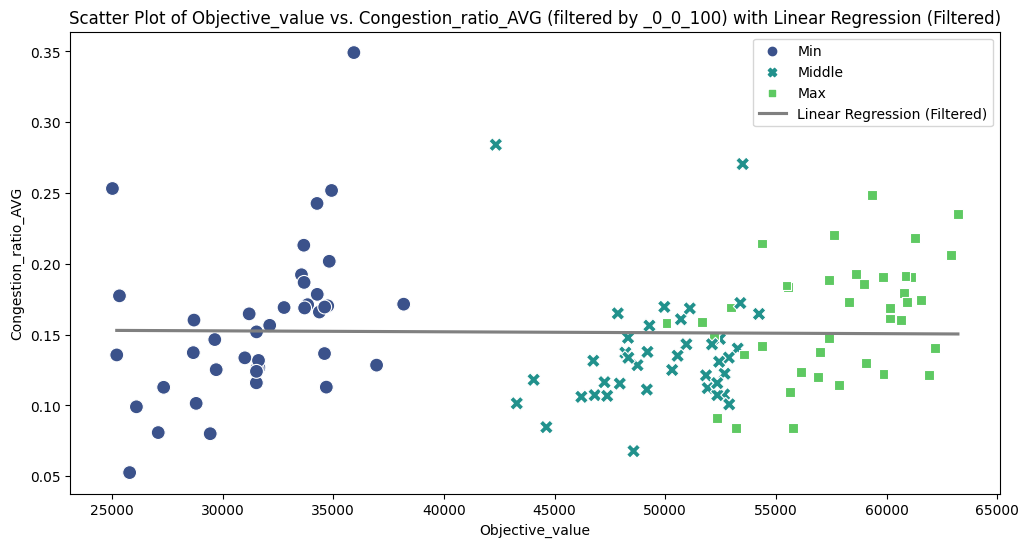

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = correlation_data.copy()

# Remove outliers for 'C_max'
filtered_data = df[df['File_name'].str.contains('_40_50_10')]

# Create a scatter plot with seaborn
plt.figure(figsize=(12, 6))

# Scatter plot
sns.scatterplot(data=filtered_data, x='Objective_value', y='Congestion_ratio_AVG', hue='Type', style='Type', palette='viridis', s=100)

# Linear regression for the filtered dataset
X_filtered = filtered_data['Objective_value'].values.reshape(-1, 1)
y_filtered = filtered_data['Congestion_ratio_AVG'].values.reshape(-1, 1)
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)
model_filtered = LinearRegression()
model_filtered.fit(X_train_filtered, y_train_filtered)

# Plotting the linear regression line for the filtered data
sns.regplot(x=X_test_filtered.flatten(), y=model_filtered.predict(X_test_filtered).flatten(), scatter=False, color='gray', label='Linear Regression (Filtered)')

plt.title('Scatter Plot of Objective_value vs. Congestion_ratio_AVG (filtered by _0_0_100) with Linear Regression (Filtered)')
plt.xlabel('Objective_value')
plt.ylabel('Congestion_ratio_AVG')
plt.legend()
plt.show()


In [11]:
def remove_outliers(df, column_name):
    # Calculate the first and third quartiles
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the dataframe to keep only the rows within the bounds
    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    return filtered_df


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


_0_0_100 Linear Regression Equation: y = 0.7979x + 366.6574
_40_50_10 Linear Regression Equation: y = 0.8026x + 363.8980
_0_0_100 Mean Squared Error: 65.9757
_40_50_10 Mean Squared Error: 29.4529


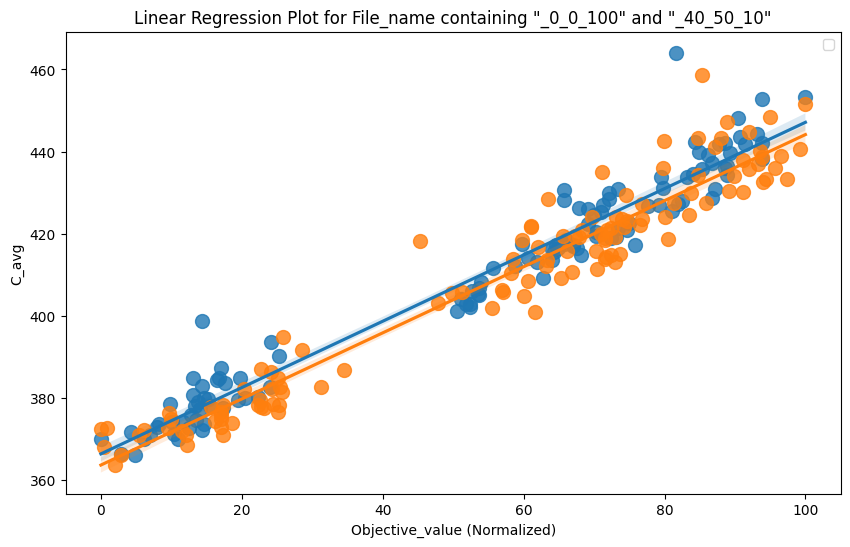

In [12]:
from sklearn.preprocessing import MinMaxScaler

# 데이터프레임에서 'Objective_value'를 0~100으로 정규화하는 함수
def normalize_objective_value(df):
    scaler = MinMaxScaler(feature_range=(0, 100))
    df['Objective_value'] = scaler.fit_transform(df['Objective_value'].values.reshape(-1, 1))
    return df

# '_0_0_100'이 포함된 행과 '_40_50_10'이 포함된 행을 추출
filtered_data_1 = remove_outliers(correlation_data[correlation_data['File_name'].str.contains('_0_0_100')], 'C_max')
filtered_data_2 = remove_outliers(correlation_data[correlation_data['File_name'].str.contains('_40_50_10')], 'C_max')

# 'Objective_value'를 0~100으로 정규화
filtered_data_1 = normalize_objective_value(filtered_data_1)
filtered_data_2 = normalize_objective_value(filtered_data_2)

# 선형 회귀 모델 훈련 (두 데이터에 대해 각각)
X_1 = filtered_data_1['Objective_value'].values.reshape(-1, 1)
y_1 = filtered_data_1['C_avg'].values.reshape(-1, 1)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

model_1 = LinearRegression()
model_1.fit(X_train_1, y_train_1)

X_2 = filtered_data_2['Objective_value'].values.reshape(-1, 1)
y_2 = filtered_data_2['C_avg'].values.reshape(-1, 1)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

model_2 = LinearRegression()
model_2.fit(X_train_2, y_train_2)

# 예측 결과
y_pred_1 = model_1.predict(X_test_1)
y_pred_2 = model_2.predict(X_test_2)

# 선형 회귀 그래프 그리기
plt.figure(figsize=(10, 6))
sns.regplot(x='Objective_value', y='C_avg', data=filtered_data_1, scatter_kws={'s': 100}, label='_0_0_100')
sns.regplot(x='Objective_value', y='C_avg', data=filtered_data_2, scatter_kws={'s': 100}, label='_40_50_10')
plt.title('Linear Regression Plot for File_name containing "_0_0_100" and "_40_50_10"')
plt.xlabel('Objective_value (Normalized)')
plt.ylabel('C_avg')

# 범례 추가
plt.legend()

# 선형 회귀식 출력
print(f"_0_0_100 Linear Regression Equation: y = {model_1.coef_[0][0]:.4f}x + {model_1.intercept_[0]:.4f}")
print(f"_40_50_10 Linear Regression Equation: y = {model_2.coef_[0][0]:.4f}x + {model_2.intercept_[0]:.4f}")

# 평가 지표 출력
mse_1 = mean_squared_error(y_test_1, y_pred_1)
mse_2 = mean_squared_error(y_test_2, y_pred_2)
print(f"_0_0_100 Mean Squared Error: {mse_1:.4f}")
print(f"_40_50_10 Mean Squared Error: {mse_2:.4f}")

# 그래프 표시
plt.show()


<Figure size 1200x600 with 0 Axes>

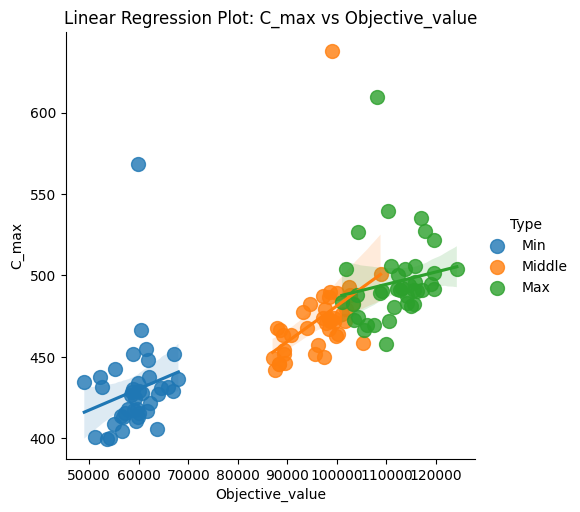

In [13]:
df = correlation_data.copy()

# Filter data based on the condition
filtered_df = df[df['File_name'].str.contains('0_0_100')]

# Create a linear regression plot with scatter points colored by Type
plt.figure(figsize=(12, 6))
sns.lmplot(x='Objective_value', y='C_max', data=filtered_df, hue='Type', scatter_kws={'s': 100})

# Set plot labels and title
plt.title('Linear Regression Plot: C_max vs Objective_value')
plt.xlabel('Objective_value')
plt.ylabel('C_max')

# Show the plot
plt.show()

Min_T_Obj_mean:  1.0
Middle_T_Obj_mean:  1.6072787805460507
Max_T_Obj_mean:  1.867859038805344
Min_T_Cmax_mean:  1.0
Middle_T_Cmax_mean:  1.1047801204082925
Max_T_Cmax_mean:  1.1588740953515628
Min_T_Cavg_mean:  1.0
Middle_T_Cavg_mean:  1.101653043545311
Max_T_Cavg_mean:  1.1527811993173551


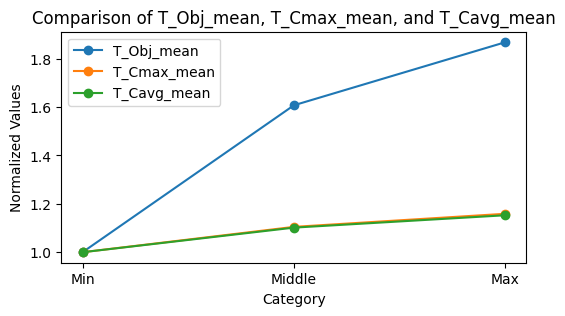

In [14]:
# File_name이 같은 데이터끼리 그룹화
grouped_data = correlation_data.groupby('File_name')

Min_T_Obj = []
Min_T_Cmax = []
Min_T_Cavg = []

Middle_T_Obj = []
Middle_T_Cmax = []
Middle_T_Cavg = []

Max_T_Obj = []
Max_T_Cmax = []
Max_T_Cavg= []

# 그룹화된 데이터마다 Type이 Min인 Objective_value값을 기준으로 Middle, Max의 Objective_value값이 Min대비 몇 배인지 계산
for name, group in grouped_data:
    group.sort_values(by='Type')
    group['T_Obj'] = group['Objective_value'] / group['Objective_value'].iloc[0]
    group['T_Cmax'] = group['C_max'] / group['C_max'].iloc[0]
    group['T_Cavg'] = group['C_avg'] / group['C_avg'].iloc[0]

    # 각 행의 Type이 Min인지 Middle인지 Max인지에 따라 T_Obj, T_Cmax, T_Cavg의 리스트에 append
    for i in range(len(group)):
        if group['Type'].iloc[i] == 'Min':
            Min_T_Obj.append(group['T_Obj'].iloc[i])
            Min_T_Cmax.append(group['T_Cmax'].iloc[i])
            Min_T_Cavg.append(group['T_Cavg'].iloc[i])
        elif group['Type'].iloc[i] == 'Middle':
            Middle_T_Obj.append(group['T_Obj'].iloc[i])
            Middle_T_Cmax.append(group['T_Cmax'].iloc[i])
            Middle_T_Cavg.append(group['T_Cavg'].iloc[i])
        elif group['Type'].iloc[i] == 'Max':
            Max_T_Obj.append(group['T_Obj'].iloc[i])
            Max_T_Cmax.append(group['T_Cmax'].iloc[i])
            Max_T_Cavg.append(group['T_Cavg'].iloc[i])

    # print(group)
Min_T_Obj_mean = sum(Min_T_Obj) / len(Min_T_Obj)
Middle_T_Obj_mean = sum(Middle_T_Obj) / len(Middle_T_Obj)
Max_T_Obj_mean = sum(Max_T_Obj) / len(Max_T_Obj)

Min_T_Cmax_mean = sum(Min_T_Cmax) / len(Min_T_Cmax)
Middle_T_Cmax_mean = sum(Middle_T_Cmax) / len(Middle_T_Cmax)
Max_T_Cmax_mean = sum(Max_T_Cmax) / len(Max_T_Cmax)

Min_T_Cavg_mean = sum(Min_T_Cavg) / len(Min_T_Cavg)
Middle_T_Cavg_mean = sum(Middle_T_Cavg) / len(Middle_T_Cavg)
Max_T_Cavg_mean = sum(Max_T_Cavg) / len(Max_T_Cavg)

print('Min_T_Obj_mean: ', Min_T_Obj_mean)
print('Middle_T_Obj_mean: ', Middle_T_Obj_mean)
print('Max_T_Obj_mean: ', Max_T_Obj_mean)

print('Min_T_Cmax_mean: ', Min_T_Cmax_mean)
print('Middle_T_Cmax_mean: ', Middle_T_Cmax_mean)
print('Max_T_Cmax_mean: ', Max_T_Cmax_mean)

print('Min_T_Cavg_mean: ', Min_T_Cavg_mean)
print('Middle_T_Cavg_mean: ', Middle_T_Cavg_mean)
print('Max_T_Cavg_mean: ', Max_T_Cavg_mean)







import matplotlib.pyplot as plt

# Data
categories = ['Min', 'Middle', 'Max']
T_Obj_mean_values = [1.0, 1.6072787805460507, 1.867859038805344]
T_Cmax_mean_values = [1.0, 1.1047801204082925, 1.1588740953515628]
T_Cavg_mean_values = [1.0, 1.101653043545311, 1.1527811993173553]

# Plotting
plt.figure(figsize=(6, 3))

# Line plot for T_Obj_mean
plt.plot(categories, T_Obj_mean_values, marker='o', label='T_Obj_mean')

# Line plot for T_Cmax_mean
plt.plot(categories, T_Cmax_mean_values, marker='o', label='T_Cmax_mean')

# Line plot for T_Cavg_mean
plt.plot(categories, T_Cavg_mean_values, marker='o', label='T_Cavg_mean')

# Title and labels
plt.title('Comparison of T_Obj_mean, T_Cmax_mean, and T_Cavg_mean')
plt.xlabel('Category')
plt.ylabel('Normalized Values')  # Assuming these are normalized values

# Legend
plt.legend()

# Display the plot
plt.show()



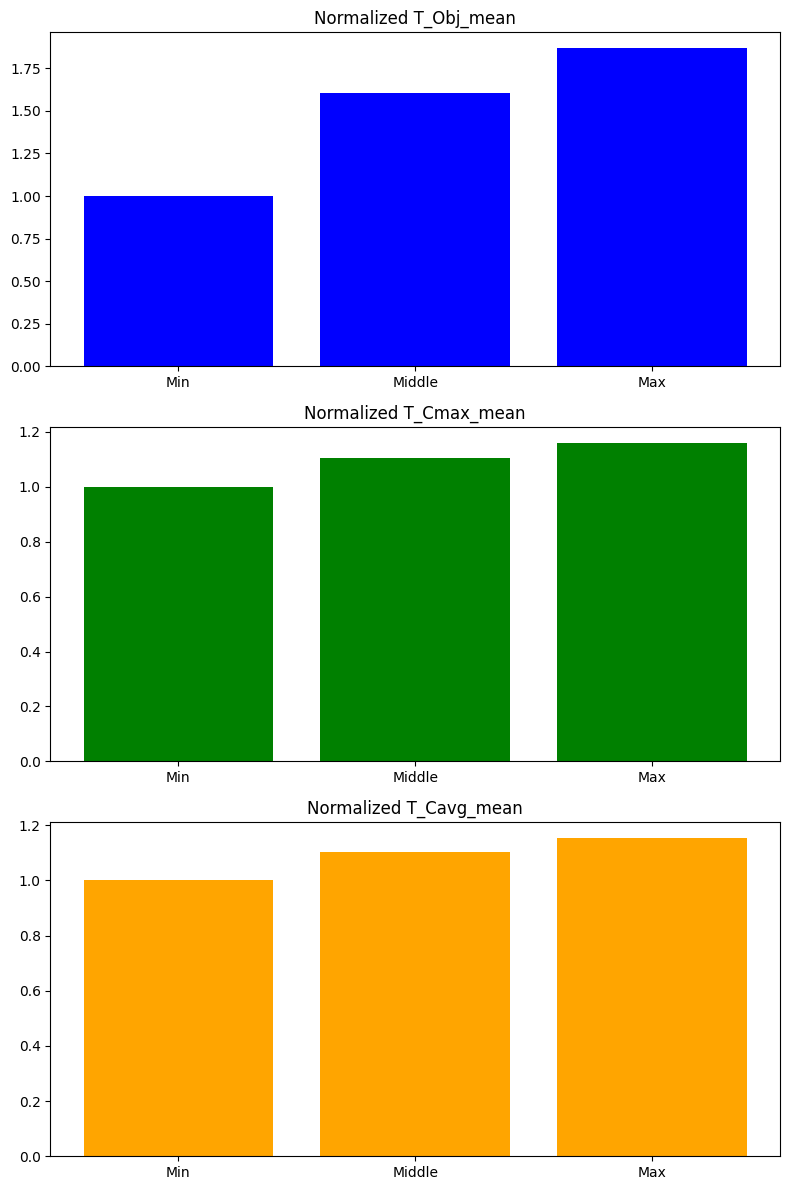

In [15]:
import matplotlib.pyplot as plt

# Data
categories = ['Min', 'Middle', 'Max']
T_Obj_mean_values = [1.0, 1.6072787805460507, 1.867859038805344]
T_Cmax_mean_values = [1.0, 1.1047801204082925, 1.1588740953515628]
T_Cavg_mean_values = [1.0, 1.101653043545311, 1.1527811993173553]

# Find minimum values for normalization
min_T_Obj_mean = min(T_Obj_mean_values)
min_T_Cmax_mean = min(T_Cmax_mean_values)
min_T_Cavg_mean = min(T_Cavg_mean_values)

# Normalize data using minimum values
norm_T_Obj_mean = [val / min_T_Obj_mean for val in T_Obj_mean_values]
norm_T_Cmax_mean = [val / min_T_Cmax_mean for val in T_Cmax_mean_values]
norm_T_Cavg_mean = [val / min_T_Cavg_mean for val in T_Cavg_mean_values]

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))

# Plot normalized T_Obj_mean
ax1.bar(categories, norm_T_Obj_mean, color='blue')
ax1.set_title('Normalized T_Obj_mean')

# Plot normalized T_Cmax_mean
ax2.bar(categories, norm_T_Cmax_mean, color='green')
ax2.set_title('Normalized T_Cmax_mean')

# Plot normalized T_Cavg_mean
ax3.bar(categories, norm_T_Cavg_mean, color='orange')
ax3.set_title('Normalized T_Cavg_mean')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()
